In [ ]:
pip install gensim

In [ ]:

import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
data = pd.read_csv('train_en.txt', sep='\t', on_bad_lines='skip')
data.tail()
data['Tokens'] = data['Sentence'].apply(lambda x: word_tokenize(x))
data


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sentence     Style  \
0       Cute interior and owner (?) gave us tour of up...  positive   
1       I've been to this location many times when I l...  negative   
2       My food only merited maybe two stars but I wil...  negative   
3       After trying a few ramen places with crazy var...  negative   
4       I cannot even believe someone gave this place ...  positive   
...                                                   ...       ...   
342900  So I've belonged to a gym for YEARS and I fina...  positive   
342901  ice cream! ice cream sodas, sundaes!! \n\nwant...  positive   
342902  This is a good pizza option - they deliver thr...  negative   
342903  Don't misinterpret my 5-star review....I don't...  positive   
342904  This Home Depot won me over when I needed to g...  positive   

                          User  \
0       bcjbaE6dDog4jkNY91ncLQ   
1       enaHB1e956thdnafcHVAig   
2       07aVWNhBhpwqW3MdqoKDKQ   
3       OkjeFppodgJP_CvB84cJYw   
4       7Ie0VmQtnGYUVq2YW4dTVw   
...                        ...   
342900  O5y7KlfBdqV6Ih8yhjZLsg   
342901  7ziWZULyiZv2TesYNMFf4g   
342902  MCzlzlOw7IGbRAKVjJBPtg   
342903  x1QLCwZGFAjxRRw4EHc3-g   
342904  mm6E4FbCMwJmb7kPDZ5v2Q   

                                                   Tokens  
0       [Cute, interior, and, owner, (, ?, ), gave, us...  
1       [I, 've, been, to, this, location, many, times...  
2       [My, food, only, merited, maybe, two, stars, b...  
3       [After, trying, a, few, ramen, places, with, c...  
4       [I, can, not, even, believe, someone, gave, th...  
...                                                   ...  
342900  [So, I, 've, belonged, to, a, gym, for, YEARS,...  
342901  [ice, cream, !, ice, cream, sodas, ,, sundaes,...  
342902  [This, is, a, good, pizza, option, -, they, de...  
342903  [Do, n't, misinterpret, my, 5-star, review, .....  
342904  [This, Home, Depot, won, me, over, when, I, ne...  

[342905 rows x 4 columns]

In [ ]:
sentences = data['Tokens'].values.tolist()
sentences

[['Cute',
  'interior',
  'and',
  'owner',
  '(',
  '?',
  ')',
  'gave',
  'us',
  'tour',
  'of',
  'upcoming',
  'patio/rooftop',
  'area',
  'which',
  'will',
  'be',
  'great',
  'on',
  'beautiful',
  'days',
  'like',
  'today',
  '.',
  'Cheese',
  'curds',
  'were',
  'very',
  'good',
  'and',
  'very',
  'filling',
  '.',
  'Really',
  'like',
  'that',
  'sandwiches',
  'come',
  'w',
  'salad',
  ',',
  'esp',
  'after',
  'eating',
  'too',
  'many',
  'curds',
  '!',
  'Had',
  'the',
  'onion',
  ',',
  'gruyere',
  ',',
  'tomato',
  'sandwich',
  '.',
  'Was',
  "n't",
  'too',
  'much',
  'cheese',
  'which',
  'I',
  'liked',
  '.',
  'Needed',
  'something',
  'else',
  '...',
  'pepper',
  'jelly',
  'maybe',
  '.',
  'Would',
  'like',
  'to',
  'see',
  'more',
  'menu',
  'options',
  'added',
  'such',
  'as',
  'salads',
  'w',
  'fun',
  'cheeses',
  '.',
  'Lots',
  'of',
  'beer',
  'and',
  'wine',
  'as',
  'well',
  'as',
  'limited',
  'cocktails',
 

In [ ]:
word2vec_model = Word2Vec(sentences, vector_size=100, window=3, min_count=15, sg=1)

In [ ]:
tsne = TSNE(n_components=2)
words = word2vec_model.wv.index_to_key
word_vectors = word2vec_model.wv.vectors

In [ ]:
word_vectors_2d = tsne.fit_transform(word_vectors[:50])


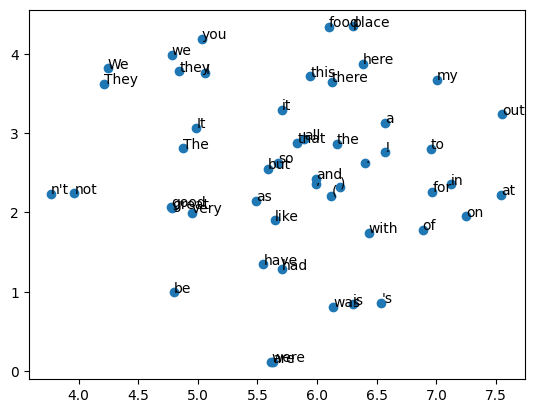

In [ ]:
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for label, x, y in zip(words[:50], word_vectors_2d[:, 0], word_vectors_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [ ]:
result = word2vec_model.wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])
result

[('NYC', 0.6526111960411072),
 ('Brooklyn', 0.6289903521537781),
 ('Rome', 0.6240317821502686),
 ('Germany', 0.6121864914894104),
 ('Baguette', 0.6116203665733337),
 ('Caesars', 0.6058489680290222),
 ('Conshohocken', 0.605492889881134),
 ('Naples', 0.5775542855262756),
 ('Spain', 0.5765311121940613),
 ('Boston', 0.5751126408576965)]

In [ ]:
result2 = word2vec_model.wv.most_similar(positive=['Madrid', 'France'], negative=['Spain'])
result2

[('Oklahoma', 0.7411254048347473),
 ('Ireland', 0.7229990363121033),
 ('Portland', 0.7205700874328613),
 ('SC', 0.7133970260620117),
 ('L.A.', 0.713171124458313),
 ('Toronto', 0.7117433547973633),
 ('Peters', 0.7089096903800964),
 ('Milan', 0.7076210975646973),
 ('Sacramento', 0.7069093585014343),
 ('Scotland', 0.7058281302452087)]

In [ ]:
result3 = word2vec_model.wv.most_similar(positive=['King', 'Woman'], negative=['Man'])
result3

[('Women', 0.577309250831604),
 ('Mattress', 0.5717511177062988),
 ('Simon', 0.5717480182647705),
 ('Vision', 0.5673608183860779),
 ('Penney', 0.5594525933265686),
 ('Armani', 0.5583069324493408),
 ('Tile', 0.5536360740661621),
 ('Bug', 0.5463938117027283),
 ('Harvey', 0.5461026430130005),
 ('Christiana', 0.5444364547729492)]

In [ ]:
word2vec_model_cbow = Word2Vec(sentences, vector_size=100, window=3, min_count=15, sg=0)

In [ ]:
result4 = word2vec_model.wv.most_similar(positive=['Bigger', 'Cold'], negative=['Big'])
result4

[('weaker', 0.5983775854110718),
 ('Pricier', 0.5854771733283997),
 ('marginally', 0.5481860637664795),
 ('Cheaper', 0.542066216468811),
 ('Closer', 0.5296278595924377),
 ('greasier', 0.5294308066368103),
 ('creamier', 0.5280670523643494),
 ('denser', 0.5237889289855957),
 ('dilute', 0.5230397582054138),
 ('10x', 0.5211262702941895)]

In [ ]:
result5 = word2vec_model.wv.most_similar(positive=['Windows', 'Google'], negative=['Microsoft'])
result5

[('Ins', 0.48033222556114197),
 ('Diners', 0.47645464539527893),
 ('google', 0.47046875953674316),
 ('Turn', 0.47008588910102844),
 ('sidewalk', 0.46592411398887634),
 ('Closed', 0.4645508825778961),
 ('flashing', 0.45681867003440857),
 ('Drive-Ins', 0.4562016725540161),
 ('Drive-ins', 0.4547377824783325),
 ('4PM', 0.4516070485115051)]

In [ ]:
word2vec_model_more = Word2Vec(sentences, vector_size=150, window=3, min_count=15, sg=1)



---

Task 2


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [ ]:
counts = Counter(words)
valid = {w for w,c in counts.items() if c >= 15}
UNK = "<unk>"
vocab = {UNK} | valid
word_to_idx = {w:i for i,w in enumerate(valid)}
model = Sequential()
model.add(Embedding(input_dim=len(words), output_dim=100,
                    weights=[word_vectors], trainable=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     3,337,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,337,100 (12.73 MB)

 Trainable params: 3,337,100 (12.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
word_to_id = {word: i for i, word in enumerate(words)}
word_to_id["<unk>"] = len(word_to_id)
data['Tokens ID'] = data['Tokens'].apply(lambda x: [word_to_id.get(word, word_to_id["<unk>"]) for word in x])

data
tokens_list = data['Tokens ID'].values
tokens_list
padded_sentences = pad_sequences(tokens_list, maxlen=10)
padded_sentences

array([[   55,     4,    78, ...,  1774,  1464,     0],
       [    5, 13000,  2786, ...,   350,   486,     0],
       [  327,  2412,   110, ...,  4432,  3676,    12],
       ...,
       [  768,    13,     1, ..., 33371,    10,     0],
       [  114,    39,  4616, ...,    73,     6,     0],
       [   65,    36,   177, ...,  6647,  6848,     0]], dtype=int32)

In [ ]:
labels = [1 if label=='positive' else 0 for label in data['Style']]
labels

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [ ]:
model.fit(padded_sentences, np.array(labels), epochs=5)
model

Epoch 1/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - accuracy: 0.7801 - loss: 0.4658
Epoch 2/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.8184 - loss: 0.4020
Epoch 3/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.8384 - loss: 0.3672
Epoch 4/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.8602 - loss: 0.3241
Epoch 5/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 73s 7ms/step - accuracy: 0.8807 - loss: 0.2805


<Sequential name=sequential, built=True>

In [ ]:
df_test = pd.read_csv("train_en.txt", sep='\t', on_bad_lines='skip')

In [ ]:
df_test['Tokens'] = data['Sentence'].apply(lambda x: word_tokenize(x))
df_test

Sentence     Style  \
0       Cute interior and owner (?) gave us tour of up...  positive   
1       I've been to this location many times when I l...  negative   
2       My food only merited maybe two stars but I wil...  negative   
3       After trying a few ramen places with crazy var...  negative   
4       I cannot even believe someone gave this place ...  positive   
...                                                   ...       ...   
342900  So I've belonged to a gym for YEARS and I fina...  positive   
342901  ice cream! ice cream sodas, sundaes!! \n\nwant...  positive   
342902  This is a good pizza option - they deliver thr...  negative   
342903  Don't misinterpret my 5-star review....I don't...  positive   
342904  This Home Depot won me over when I needed to g...  positive   

                          User  \
0       bcjbaE6dDog4jkNY91ncLQ   
1       enaHB1e956thdnafcHVAig   
2       07aVWNhBhpwqW3MdqoKDKQ   
3       OkjeFppodgJP_CvB84cJYw   
4       7Ie0VmQtnGYUVq2YW4dTVw   
...                        ...   
342900  O5y7KlfBdqV6Ih8yhjZLsg   
342901  7ziWZULyiZv2TesYNMFf4g   
342902  MCzlzlOw7IGbRAKVjJBPtg   
342903  x1QLCwZGFAjxRRw4EHc3-g   
342904  mm6E4FbCMwJmb7kPDZ5v2Q   

                                                   Tokens  
0       [Cute, interior, and, owner, (, ?, ), gave, us...  
1       [I, 've, been, to, this, location, many, times...  
2       [My, food, only, merited, maybe, two, stars, b...  
3       [After, trying, a, few, ramen, places, with, c...  
4       [I, can, not, even, believe, someone, gave, th...  
...                                                   ...  
342900  [So, I, 've, belonged, to, a, gym, for, YEARS,...  
342901  [ice, cream, !, ice, cream, sodas, ,, sundaes,...  
342902  [This, is, a, good, pizza, option, -, they, de...  
342903  [Do, n't, misinterpret, my, 5-star, review, .....  
342904  [This, Home, Depot, won, me, over, when, I, ne...  

[342905 rows x 4 columns]

In [ ]:
sentences = df_test['Tokens'].values.tolist()
sentences

[['Cute',
  'interior',
  'and',
  'owner',
  '(',
  '?',
  ')',
  'gave',
  'us',
  'tour',
  'of',
  'upcoming',
  'patio/rooftop',
  'area',
  'which',
  'will',
  'be',
  'great',
  'on',
  'beautiful',
  'days',
  'like',
  'today',
  '.',
  'Cheese',
  'curds',
  'were',
  'very',
  'good',
  'and',
  'very',
  'filling',
  '.',
  'Really',
  'like',
  'that',
  'sandwiches',
  'come',
  'w',
  'salad',
  ',',
  'esp',
  'after',
  'eating',
  'too',
  'many',
  'curds',
  '!',
  'Had',
  'the',
  'onion',
  ',',
  'gruyere',
  ',',
  'tomato',
  'sandwich',
  '.',
  'Was',
  "n't",
  'too',
  'much',
  'cheese',
  'which',
  'I',
  'liked',
  '.',
  'Needed',
  'something',
  'else',
  '...',
  'pepper',
  'jelly',
  'maybe',
  '.',
  'Would',
  'like',
  'to',
  'see',
  'more',
  'menu',
  'options',
  'added',
  'such',
  'as',
  'salads',
  'w',
  'fun',
  'cheeses',
  '.',
  'Lots',
  'of',
  'beer',
  'and',
  'wine',
  'as',
  'well',
  'as',
  'limited',
  'cocktails',
 

In [ ]:
df_test['Tokens ID'] = df_test['Tokens'].apply(
    lambda x: [word_to_id.get(word, word_to_id["<unk>"]) for word in x]
)
df_test

Sentence     Style  \
0       Cute interior and owner (?) gave us tour of up...  positive   
1       I've been to this location many times when I l...  negative   
2       My food only merited maybe two stars but I wil...  negative   
3       After trying a few ramen places with crazy var...  negative   
4       I cannot even believe someone gave this place ...  positive   
...                                                   ...       ...   
342900  So I've belonged to a gym for YEARS and I fina...  positive   
342901  ice cream! ice cream sodas, sundaes!! \n\nwant...  positive   
342902  This is a good pizza option - they deliver thr...  negative   
342903  Don't misinterpret my 5-star review....I don't...  positive   
342904  This Home Depot won me over when I needed to g...  positive   

                          User  \
0       bcjbaE6dDog4jkNY91ncLQ   
1       enaHB1e956thdnafcHVAig   
2       07aVWNhBhpwqW3MdqoKDKQ   
3       OkjeFppodgJP_CvB84cJYw   
4       7Ie0VmQtnGYUVq2YW4dTVw   
...                        ...   
342900  O5y7KlfBdqV6Ih8yhjZLsg   
342901  7ziWZULyiZv2TesYNMFf4g   
342902  MCzlzlOw7IGbRAKVjJBPtg   
342903  x1QLCwZGFAjxRRw4EHc3-g   
342904  mm6E4FbCMwJmb7kPDZ5v2Q   

                                                   Tokens  \
0       [Cute, interior, and, owner, (, ?, ), gave, us...   
1       [I, 've, been, to, this, location, many, times...   
2       [My, food, only, merited, maybe, two, stars, b...   
3       [After, trying, a, few, ramen, places, with, c...   
4       [I, can, not, even, believe, someone, gave, th...   
...                                                   ...   
342900  [So, I, 've, belonged, to, a, gym, for, YEARS,...   
342901  [ice, cream, !, ice, cream, sodas, ,, sundaes,...   
342902  [This, is, a, good, pizza, option, -, they, de...   
342903  [Do, n't, misinterpret, my, 5-star, review, .....   
342904  [This, Home, Depot, won, me, over, when, I, ne...   

                                                Tokens ID  
0       [2823, 976, 3, 532, 41, 96, 39, 456, 125, 1327...  
1       [4, 70, 73, 6, 26, 140, 180, 178, 79, 4, 1115,...  
2       [84, 34, 86, 33371, 469, 159, 272, 18, 4, 78, ...  
3       [516, 408, 5, 134, 1184, 261, 15, 925, 407, 13...  
4       [4, 63, 29, 112, 653, 496, 456, 26, 30, 57, 47...  
...                                                   ...  
342900  [188, 4, 70, 15172, 6, 5, 1480, 11, 12806, 3, ...  
342901  [318, 274, 12, 318, 274, 3020, 2, 7211, 12, 12...  
342902  [68, 9, 5, 31, 139, 578, 91, 25, 1755, 317, 11...  
342903  [520, 23, 33371, 22, 4888, 332, 357, 4, 54, 23...  
342904  [68, 2432, 3425, 2752, 50, 136, 79, 4, 411, 6,...  

[342905 rows x 5 columns]

In [ ]:
padded_sentences = pad_sequences(df_test['Tokens ID'], maxlen=10)

In [ ]:
predictions = model.predict(padded_sentences)

10716/10716 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step


In [ ]:
y_pred = (predictions > 0.5).astype(int)

In [ ]:
y_true = df_test['Style'].apply(lambda x: 1 if x.lower() == 'positive' else 0).values

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"recision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1: {f1:.4f}")

Accuracy: 0.9064
recision: 0.9088
Recall: 0.9670
F1: 0.9370


In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=len(words), output_dim=100,
                    weights=[word_vectors], trainable=True))
model2.add(LSTM(128))
model2.add(Dense(1, activation='sigmoid'))
optimizer1 = Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer1, metrics=['accuracy'])
y_pred2 = model2.fit(padded_sentences, np.array(labels), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.7808 - loss: 0.4645
Epoch 2/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 74s 7ms/step - accuracy: 0.8194 - loss: 0.4016
Epoch 3/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 74s 7ms/step - accuracy: 0.8375 - loss: 0.3667
Epoch 4/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 74s 7ms/step - accuracy: 0.8594 - loss: 0.3249
Epoch 5/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.8810 - loss: 0.2806
Epoch 6/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9002 - loss: 0.2366
Epoch 7/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9191 - loss: 0.1945
Epoch 8/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9349 - loss: 0.1593
Epoch 9/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9472 - loss: 0.1306
Epoch 10/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9571 - loss: 0.1092


In [ ]:
model3 = Sequential()
model3.add(Embedding(input_dim=len(words), output_dim=100,
                    weights=[word_vectors], trainable=True))
model3.add(LSTM(128))
model3.add(Dense(1, activation='sigmoid'))
optimizer2 = Adam(learning_rate=0.05)
model3.compile(loss='binary_crossentropy', optimizer=optimizer2, metrics=['accuracy'])
y_pred2 = model3.fit(padded_sentences, np.array(labels), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 73s 7ms/step - accuracy: 0.7012 - loss: 0.5974
Epoch 2/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.6988 - loss: 0.5994
Epoch 3/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.7000 - loss: 0.5986
Epoch 4/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.6986 - loss: 0.5988
Epoch 5/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.7002 - loss: 0.5986
Epoch 6/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.7006 - loss: 0.5967
Epoch 7/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.7017 - loss: 0.5950
Epoch 8/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.6997 - loss: 0.5969
Epoch 9/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.7012 - loss: 0.5947
Epoch 10/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 76s 7ms/step - accuracy: 0.7009 - loss: 0.5944
